# Mini Project on Indian District Voting Information Analysis
# Source: https://www.data.gov.in/

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, countDistinct, avg, min, max, sum, desc
from pyspark.sql.types import IntegerType, StringType, DoubleType


# 🗳️ Dataset Insights — India 2024 District Voting Data

- **Total Rows:** 779  
- **Total Columns:** 23  
- **Missing Values:** 0  
- **Duplicate Rows:** 0  

---

## 📋 Column Overview

| Column Name                  | Description                                                   |
|------------------------------|---------------------------------------------------------------|
| State Name                   | Name of the Indian state                                      |
| District                     | District name within the state                                |
| Constituency Type            | Type of constituency (GEN / SC / ST)                          |
| No Of Seats                  | Number of seats in that district                              |
| Electors - Male              | Total number of registered male electors                      |
| Electors - Female            | Total number of registered female electors                    |
| Electors - Third Gender      | Total number of registered third-gender electors              |
| Electors - Total             | Total number of electors (Male + Female + Third Gender)       |
| Electors - NRIs              | Number of Non-Resident Indian electors                        |
| Electors - Service           | Number of service electors (e.g., defense personnel)          |
| Voters - Male                | Total male voters who cast their votes                        |
| Voters - Female              | Total female voters who cast their votes                      |
| Voters - Third Gender        | Third gender voters who cast their votes                      |
| Voters - Postal              | Votes cast via postal ballots                                 |
| Voters - Total               | Total votes cast                                              |
| Voters - NRIs                | Votes cast by NRIs                                            |
| Voters - Poll Rejected Votes | Number of rejected postal votes                               |
| Evm Rejected Votes           | Number of rejected EVM votes                                  |
| NOTA Votes                   | Votes for "None of the Above" option                          |
| Valid Votes Polled           | Total valid votes after excluding rejected ones               |
| Tendered Votes               | Votes tendered by voters                                      |
| Year                         | Election year (2024)                                          |
| Source                       | Source or reference for data collection                       |

---

## 📊 Summary Statistics (Sample)

| Metric                | Mean        | Std Dev      | Min     | Median   | Max       |
|------------------------|-------------|--------------|---------|----------|-----------|
| **No Of Seats**        | 2.51        | 1.13         | 1       | 2        | 4         |
| **Electors - Male**    | 1,510,505   | 844,386      | 52,041  | 1,486,375| 2,993,677 |
| **Electors - Female**  | ~Similar distribution as male (balanced representation) | |
| **Constituency Types** | GEN, SC, ST (3 types) | |

---

## 🧩 Key Insights

- The dataset covers **36 Indian states and union territories**.  
- **Uttar Pradesh** has the highest representation with **75 districts**.  
- The **average number of seats per district** is approximately **2.5**.  
- **Voter registration is gender-balanced**, with similar counts for male and female electors.  
- Data shows **consistent structure** — no missing or duplicate values.  
- The **total electors per district** range widely, from **~50,000** to **~3 million**, indicating population diversity.  



In [3]:
spark = SparkSession.builder \
    .appName("India_2024_District_Voting_Analysis") \
    .getOrCreate()


In [5]:
file_path = "India_2024_District_Voting_Full.csv"

df = spark.read.option("header", True).option("inferSchema", True).csv(file_path)
print("✅ Data Loaded Successfully")
df.printSchema()


✅ Data Loaded Successfully
root
 |-- State Name: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Constituency Type: string (nullable = true)
 |-- No Of Seats: integer (nullable = true)
 |-- Electors - Male: integer (nullable = true)
 |-- Electors - Female: integer (nullable = true)
 |-- Electors - Third Gender: integer (nullable = true)
 |-- Electors - Total: integer (nullable = true)
 |-- Electors - NRIs: integer (nullable = true)
 |-- Electors - Service: integer (nullable = true)
 |-- Voters - Male: integer (nullable = true)
 |-- Voters - Female: integer (nullable = true)
 |-- Voters - Third Gender: integer (nullable = true)
 |-- Voters - Postal: integer (nullable = true)
 |-- Voters - Total: integer (nullable = true)
 |-- Voters - NRIs: integer (nullable = true)
 |-- Voters - Poll Rejected Votes Postal: integer (nullable = true)
 |-- Evm Rejected Votes: integer (nullable = true)
 |-- NOTA Votes: integer (nullable = true)
 |-- Valid Votes Polled19: integer (null

In [7]:
df.show(10, truncate=False)


+--------------+---------------------------+-----------------+-----------+---------------+-----------------+-----------------------+----------------+---------------+------------------+-------------+---------------+---------------------+---------------+--------------+-------------+-----------------------------------+------------------+----------+--------------------+----------------+--------------------+----------------+
|State Name    |District                   |Constituency Type|No Of Seats|Electors - Male|Electors - Female|Electors - Third Gender|Electors - Total|Electors - NRIs|Electors - Service|Voters - Male|Voters - Female|Voters - Third Gender|Voters - Postal|Voters - Total|Voters - NRIs|Voters - Poll Rejected Votes Postal|Evm Rejected Votes|NOTA Votes|Valid Votes Polled19|Tendered Votes20|Valid Votes Polled21|Tendered Votes22|
+--------------+---------------------------+-----------------+-----------+---------------+-----------------+-----------------------+----------------+---

In [9]:
df.describe().show()

+-------+--------------------+---------+-----------------+------------------+------------------+------------------+-----------------------+------------------+-----------------+------------------+-----------------+------------------+---------------------+------------------+-----------------+-----------------+-----------------------------------+------------------+------------------+--------------------+------------------+--------------------+------------------+
|summary|          State Name| District|Constituency Type|       No Of Seats|   Electors - Male| Electors - Female|Electors - Third Gender|  Electors - Total|  Electors - NRIs|Electors - Service|    Voters - Male|   Voters - Female|Voters - Third Gender|   Voters - Postal|   Voters - Total|    Voters - NRIs|Voters - Poll Rejected Votes Postal|Evm Rejected Votes|        NOTA Votes|Valid Votes Polled19|  Tendered Votes20|Valid Votes Polled21|  Tendered Votes22|
+-------+--------------------+---------+-----------------+--------------

In [11]:
print(f"Total Rows: {df.count()}")
print(f"Total Columns: {len(df.columns)}")

Total Rows: 779
Total Columns: 23


In [13]:
from pyspark.sql.functions import isnan, when, count
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+----------+--------+-----------------+-----------+---------------+-----------------+-----------------------+----------------+---------------+------------------+-------------+---------------+---------------------+---------------+--------------+-------------+-----------------------------------+------------------+----------+--------------------+----------------+--------------------+----------------+
|State Name|District|Constituency Type|No Of Seats|Electors - Male|Electors - Female|Electors - Third Gender|Electors - Total|Electors - NRIs|Electors - Service|Voters - Male|Voters - Female|Voters - Third Gender|Voters - Postal|Voters - Total|Voters - NRIs|Voters - Poll Rejected Votes Postal|Evm Rejected Votes|NOTA Votes|Valid Votes Polled19|Tendered Votes20|Valid Votes Polled21|Tendered Votes22|
+----------+--------+-----------------+-----------+---------------+-----------------+-----------------------+----------------+---------------+------------------+-------------+---------------+-------

In [23]:
df = df.withColumnRenamed("State Name", "State") \
       .withColumnRenamed("Electors - Male", "Male_Voters_Registered") \
       .withColumnRenamed("Electors - Female", "Female_Voters_Registered") \
       .withColumnRenamed("Electors - Third Gender", "ThirdGender_Voters_Registered") \
       .withColumnRenamed("Electors - Total", "Total_Voters") \
       .withColumnRenamed("Voters - Male", "Male_Voters") \
       .withColumnRenamed("Voters - Female", "Female_Voters") \
       .withColumnRenamed("Voters - Third Gender", "ThirdGender_Voters") \
       .withColumnRenamed("Voters - Total", "Total_Votes") \
       .withColumnRenamed("Valid Votes Polled19", "Valid_Votes_2019") \
       .withColumnRenamed("Valid Votes Polled21", "Valid_Votes_2021") \
       .withColumnRenamed("NOTA Votes", "NOTA_Votes")

print("✅ Columns successfully renamed!")
df.printSchema()



✅ Columns successfully renamed!
root
 |-- State: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Constituency Type: string (nullable = true)
 |-- No Of Seats: integer (nullable = true)
 |-- Male_Voters_Registered: integer (nullable = true)
 |-- Female_Voters_Registered: integer (nullable = true)
 |-- ThirdGender_Voters_Registered: integer (nullable = true)
 |-- Total_Voters: integer (nullable = true)
 |-- Electors - NRIs: integer (nullable = true)
 |-- Electors - Service: integer (nullable = true)
 |-- Male_Voters: integer (nullable = true)
 |-- Female_Voters: integer (nullable = true)
 |-- ThirdGender_Voters: integer (nullable = true)
 |-- Voters - Postal: integer (nullable = true)
 |-- Total_Votes: integer (nullable = true)
 |-- Voters - NRIs: integer (nullable = true)
 |-- Voters - Poll Rejected Votes Postal: integer (nullable = true)
 |-- Evm Rejected Votes: integer (nullable = true)
 |-- NOTA_Votes: integer (nullable = true)
 |-- Valid_Votes_2019: integer (nu

In [25]:
df = df.dropDuplicates()
df = df.na.drop(subset=["District"])
print("✅ Cleaned data successfully")


✅ Cleaned data successfully


In [27]:
df.groupBy("District") \
  .agg(sum(col("Valid_Votes_2021")).alias("Total_Valid_Votes_2021")) \
  .orderBy(desc("Total_Valid_Votes_2021")) \
  .show(10, truncate=False)


+----------------+----------------------+
|District        |Total_Valid_Votes_2021|
+----------------+----------------------+
|Aurangabad      |4232597               |
|Dhalai          |3890509               |
|Amravati        |3814084               |
|Ramanagara      |3797340               |
|Durg            |3792452               |
|Chandigarh      |3789402               |
|Bharatpur       |3785373               |
|East Khasi Hills|3700681               |
|Shopian         |3681916               |
|Chikmagalur     |3675962               |
+----------------+----------------------+
only showing top 10 rows


In [29]:
df_turnout = df.withColumn(
    "Turnout_Percentage",
    round((col("Total_Votes") / col("Total_Voters")) * 100, 2)
)

df_turnout.select("District", "Total_Voters", "Total_Votes", "Turnout_Percentage") \
    .orderBy(desc("Turnout_Percentage")) \
    .show(15, truncate=False)


+--------------+------------+-----------+------------------+
|District      |Total_Voters|Total_Votes|Turnout_Percentage|
+--------------+------------+-----------+------------------+
|Saiha         |491131      |3178675    |647.22            |
|Rajsamand     |409698      |2327282    |568.05            |
|Wayanad       |439640      |2266586    |515.55            |
|Howrah        |311313      |1556393    |499.94            |
|Rewa          |361823      |1795401    |496.21            |
|Dibrugarh     |640148      |3157273    |493.21            |
|Bagalkot      |752896      |3353642    |445.43            |
|Ambedkar Nagar|699114      |2990203    |427.71            |
|Panna         |489155      |1942681    |397.15            |
|Bhopal        |608292      |2239051    |368.09            |
|Raebareli     |865478      |3089697    |356.99            |
|Bathinda      |862874      |3069991    |355.79            |
|Chennai       |1075905     |3595442    |334.18            |
|Dahod         |1020979 

In [31]:
df_turnout.groupBy("State") \
    .agg(round(avg("Turnout_Percentage"), 2).alias("Avg_Turnout_%")) \
    .orderBy(desc("Avg_Turnout_%")) \
    .show(15, truncate=False)


+-----------------+-------------+
|State            |Avg_Turnout_%|
+-----------------+-------------+
|Chandigarh       |261.35       |
|Mizoram          |126.83       |
|Puducherry       |116.69       |
|West Bengal      |103.3        |
|Punjab           |99.99        |
|Kerala           |97.52        |
|Karnataka        |95.06        |
|Arunachal Pradesh|93.88        |
|Odisha           |91.65        |
|Madhya Pradesh   |90.63        |
|Rajasthan        |90.52        |
|Sikkim           |90.45        |
|Tripura          |88.95        |
|Tamil Nadu       |88.51        |
|Gujarat          |85.33        |
+-----------------+-------------+
only showing top 15 rows


In [33]:
df_gender = df.select("State", "District", "Male_Voters", "Female_Voters", "Total_Votes") \
              .withColumn("Female_Percentage", round((col("Female_Voters") / col("Total_Votes")) * 100, 2))

df_gender.orderBy(desc("Female_Percentage")).show(15, truncate=False)



+-----------------+-------------------+-----------+-------------+-----------+-----------------+
|State            |District           |Male_Voters|Female_Voters|Total_Votes|Female_Percentage|
+-----------------+-------------------+-----------+-------------+-----------+-----------------+
|Maharashtra      |Mumbai City        |27897      |1797021      |1840454    |97.64            |
|Rajasthan        |Nagaur             |22715      |1571305      |1613901    |97.36            |
|Jharkhand        |Seraikela-Kharsawan|29934      |1785004      |1835054    |97.27            |
|Uttar Pradesh    |Jaunpur            |41420      |1892642      |1947971    |97.16            |
|Delhi            |South East Delhi   |41750      |1591543      |1645664    |96.71            |
|Bihar            |Darbhanga          |54466      |1898566      |1967934    |96.48            |
|Arunachal Pradesh|Upper Subansiri    |61702      |1904035      |1987937    |95.78            |
|West Bengal      |Alipurduar         |7

In [35]:
df.orderBy(desc("NOTA_Votes")) \
  .select("State", "District", "NOTA_Votes") \
  .show(10, truncate=False)


+-------------+----------------------+----------+
|State        |District              |NOTA_Votes|
+-------------+----------------------+----------+
|Uttar Pradesh|Muzaffarnagar         |69891     |
|Bihar        |Vaishali              |69810     |
|Assam        |Hojai                 |69787     |
|Assam        |Golaghat              |69689     |
|Telangana    |Kumuram Bheem Asifabad|69643     |
|Nagaland     |Kiphire               |69593     |
|Rajasthan    |Tonk                  |69553     |
|Odisha       |Nuapada               |69362     |
|West Bengal  |Purulia               |69254     |
|Bihar        |Siwan                 |69220     |
+-------------+----------------------+----------+
only showing top 10 rows


In [37]:
df.groupBy("State") \
  .agg(sum(col("Valid_Votes_2021")).alias("Total_Valid_Votes_2021")) \
  .orderBy(desc("Total_Valid_Votes_2021")) \
  .show(15, truncate=False)


+-----------------+----------------------+
|State            |Total_Valid_Votes_2021|
+-----------------+----------------------+
|Uttar Pradesh    |139417369             |
|Madhya Pradesh   |106065816             |
|Rajasthan        |86509707              |
|Tamil Nadu       |79171909              |
|Maharashtra      |76284060              |
|Karnataka        |72427332              |
|Chhattisgarh     |69196059              |
|Gujarat          |68630482              |
|Assam            |65676988              |
|Telangana        |64482913              |
|Arunachal Pradesh|61863637              |
|Odisha           |60788361              |
|Andhra Pradesh   |59397910              |
|Bihar            |57363283              |
|Jharkhand        |48443992              |
+-----------------+----------------------+
only showing top 15 rows


In [39]:
numeric_cols = ["Total_Voters", "Total_Votes", "Valid_Votes_2021", "Male_Voters", "Female_Voters"]

for col_name in numeric_cols:
    if col_name != "Total_Votes":
        corr_val = df.stat.corr("Total_Votes", col_name)
        print(f"Correlation between Total_Votes and {col_name}: {corr_val:.2f}")


Correlation between Total_Votes and Total_Voters: 0.02
Correlation between Total_Votes and Valid_Votes_2021: 1.00
Correlation between Total_Votes and Male_Voters: 0.69
Correlation between Total_Votes and Female_Voters: 0.71


In [41]:
pdf = df_turnout.toPandas()
pdf.head()


,State,District,Constituency Type,No Of Seats,Male_Voters_Registered,Female_Voters_Registered,ThirdGender_Voters_Registered,Total_Voters,Electors - NRIs,Electors - Service,...,Total_Votes,Voters - NRIs,Voters - Poll Rejected Votes Postal,Evm Rejected Votes,NOTA_Votes,Valid_Votes_2019,Tendered Votes20,Valid_Votes_2021,Tendered Votes22,Turnout_Percentage
0,Assam,Darrang,SC,3,1590533,1993841,266,3586213,301,1272,...,1900669,235,478,586,1523,1898082,26,1898082,26,53.00
1,Jammu and Kashmir,Udhampur,SC,1,1194041,1634713,236,2831766,800,1976,...,2405805,164,82,509,65324,2339890,24,2339890,24,84.96
2,Andhra Pradesh,Bapatla,GEN,3,2309196,2364727,483,4680483,1520,4557,...,2340131,612,138,685,50751,2288557,14,2288557,14,50.00
3,Andhra Pradesh,West Godavari,SC,3,2640039,1466518,486,4109064,1952,69,...,2607083,292,190,20,2029,2604844,18,2604844,18,63.45
4,Gujarat,Mehsana,GEN,3,598572,662642,367,1265465,180,3704,...,1644700,264,452,247,51897,1592104,21,1592104,21,129.97


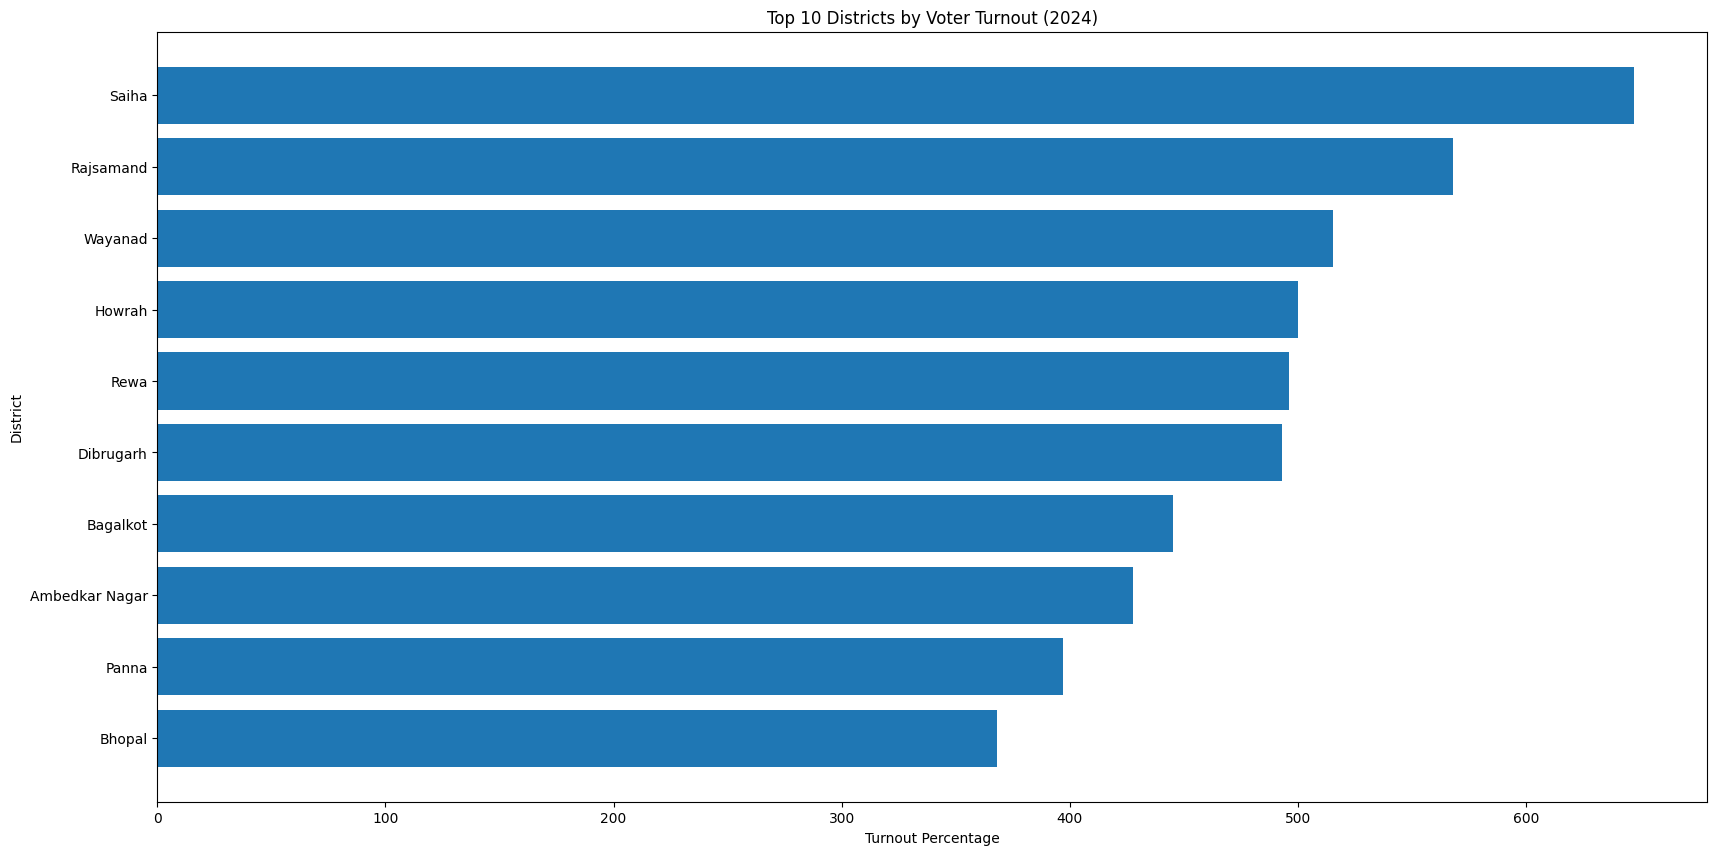

In [108]:
import matplotlib.pyplot as plt

top10_turnout = pdf.sort_values("Turnout_Percentage", ascending=False).head(10)

plt.figure(figsize=(20,10))
plt.barh(top10_turnout["District"], top10_turnout["Turnout_Percentage"])
plt.xlabel("Turnout Percentage")
plt.ylabel("District")
plt.title("Top 10 Districts by Voter Turnout (2024)")
plt.gca().invert_yaxis()
plt.show()


### 📊 Insight  
The bar chart highlights the **top 10 districts with the highest voter turnout** in the **2024 elections**, showcasing regions with **exceptional civic participation**.  



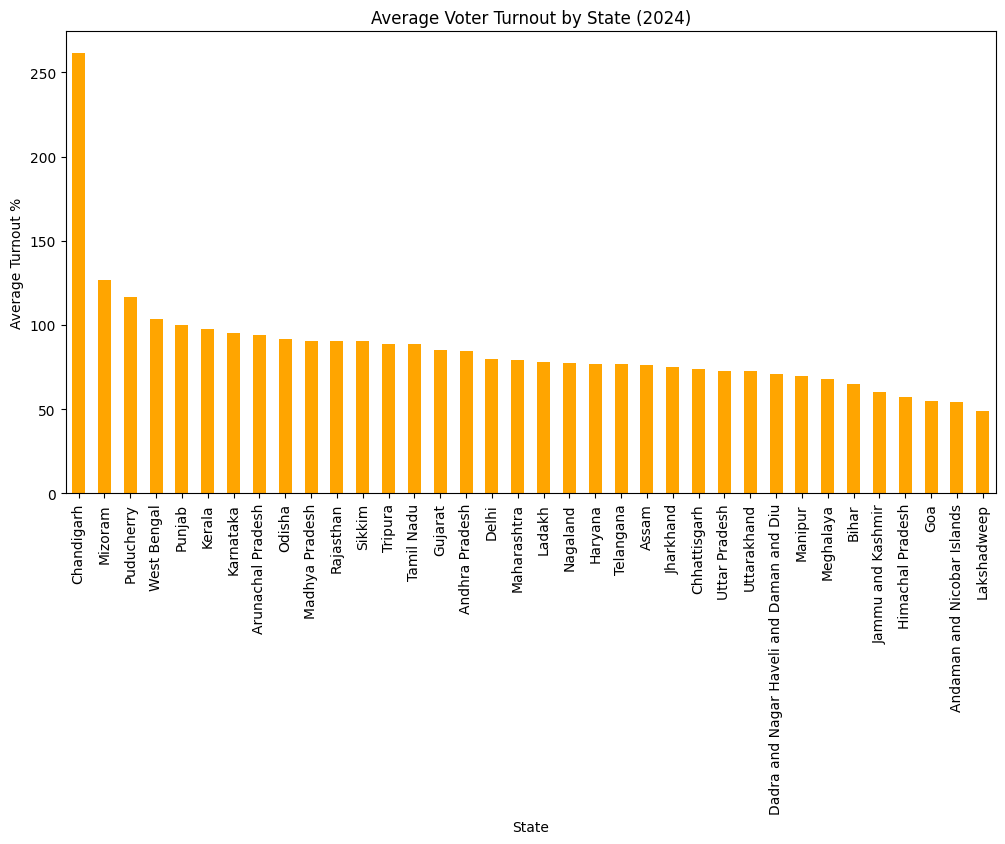

In [45]:
state_avg_turnout = pdf.groupby("State")["Turnout_Percentage"].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
state_avg_turnout.plot(kind="bar", color="orange")
plt.title("Average Voter Turnout by State (2024)")
plt.ylabel("Average Turnout %")
plt.show()


### 🗳️ Insight  
The bar chart illustrates the **average voter turnout percentage by state** in the **2024 elections**, revealing how participation levels varied across different regions of India.  


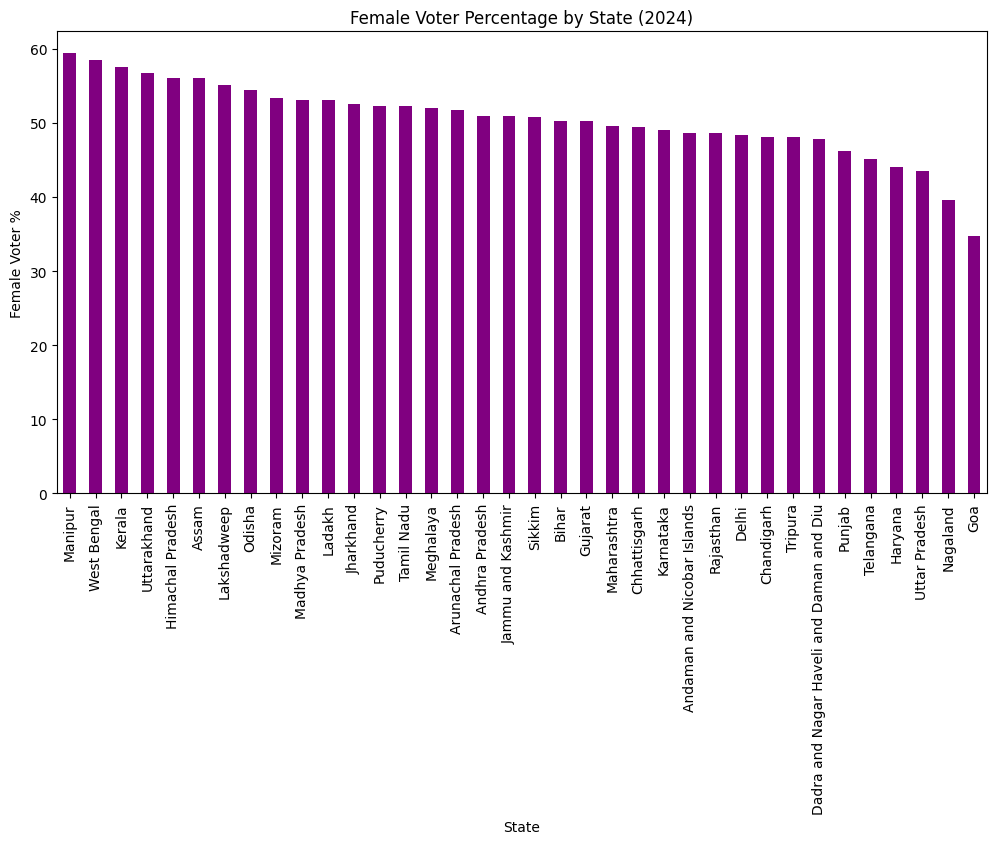

In [47]:
state_gender = pdf.groupby("State")[["Male_Voters", "Female_Voters"]].sum()
state_gender["Female_Percentage"] = (state_gender["Female_Voters"] / (state_gender["Male_Voters"] + state_gender["Female_Voters"])) * 100

plt.figure(figsize=(12,6))
state_gender["Female_Percentage"].sort_values(ascending=False).plot(kind="bar", color="purple")
plt.title("Female Voter Percentage by State (2024)")
plt.ylabel("Female Voter %")
plt.show()


### 👩‍🗳️ Insight  
The bar chart shows the **percentage of female voters by state** in the **2024 elections**, highlighting states with stronger **female electoral participation** and progress toward **gender-balanced voting**.  


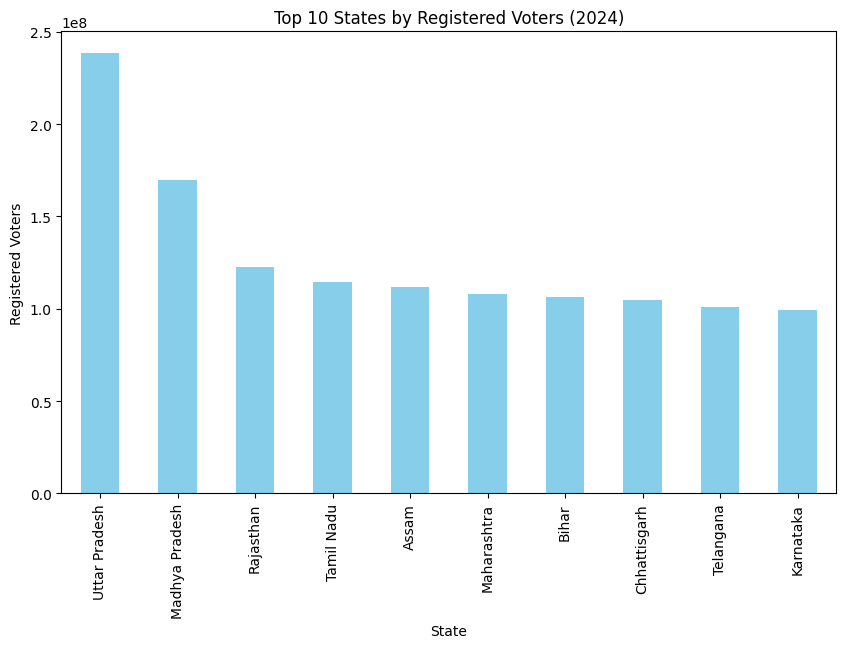

In [49]:
state_voters = pdf.groupby("State")["Total_Voters"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
state_voters.plot(kind="bar", color="skyblue")
plt.title("Top 10 States by Registered Voters (2024)")
plt.ylabel("Registered Voters")
plt.show()


### 📋 Insight  
The bar chart displays the **top 10 states with the highest number of registered voters** in the **2024 elections**, reflecting the **population density and electoral significance** of these regions.  


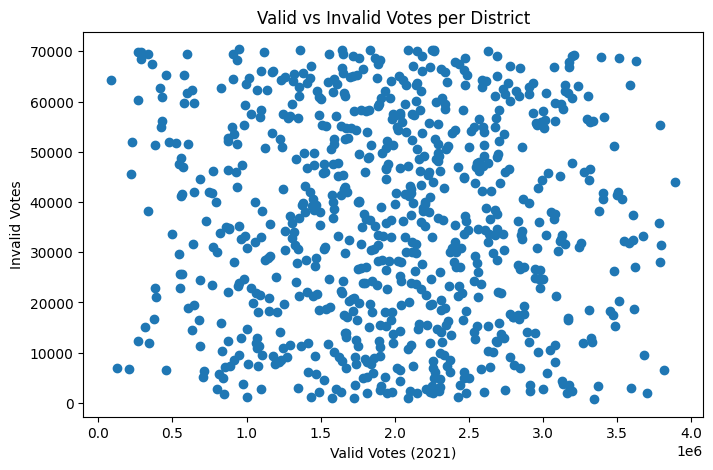

In [51]:
pdf["Invalid_Votes"] = pdf["Total_Votes"] - pdf["Valid_Votes_2021"]

plt.figure(figsize=(8,5))
plt.scatter(pdf["Valid_Votes_2021"], pdf["Invalid_Votes"])
plt.xlabel("Valid Votes (2021)")
plt.ylabel("Invalid Votes")
plt.title("Valid vs Invalid Votes per District")
plt.show()


### ⚖️ Insight  
The scatter plot compares **valid and invalid votes per district**, revealing how **invalid vote counts** vary with the **total number of valid votes**, helping identify districts with potential voting irregularities or higher rejection rates.  


In [53]:
df_turnout.filter((col("Turnout_Percentage") > 90) | (col("Turnout_Percentage") < 40)) \
          .select("State", "District", "Turnout_Percentage") \
          .orderBy(desc("Turnout_Percentage")) \
          .show(20, truncate=False)


+-----------------+---------------+------------------+
|State            |District       |Turnout_Percentage|
+-----------------+---------------+------------------+
|Mizoram          |Saiha          |647.22            |
|Rajasthan        |Rajsamand      |568.05            |
|Kerala           |Wayanad        |515.55            |
|West Bengal      |Howrah         |499.94            |
|Madhya Pradesh   |Rewa           |496.21            |
|Assam            |Dibrugarh      |493.21            |
|Karnataka        |Bagalkot       |445.43            |
|Uttar Pradesh    |Ambedkar Nagar |427.71            |
|Madhya Pradesh   |Panna          |397.15            |
|Madhya Pradesh   |Bhopal         |368.09            |
|Uttar Pradesh    |Raebareli      |356.99            |
|Punjab           |Bathinda       |355.79            |
|Tamil Nadu       |Chennai        |334.18            |
|Gujarat          |Dahod          |330.27            |
|Tripura          |Dhalai         |311.01            |
|West Beng

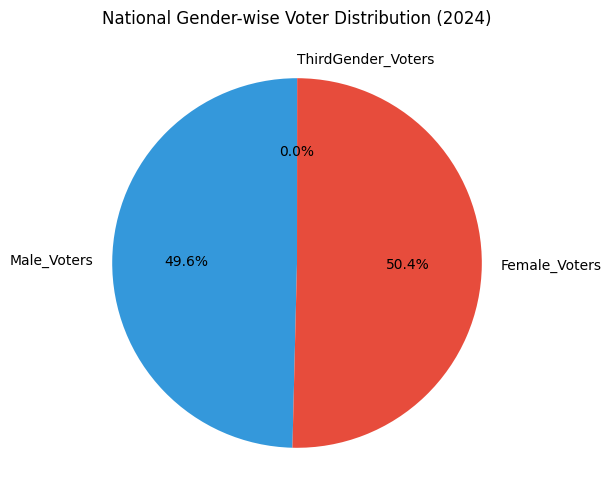

In [57]:
gender_totals = pdf[["Male_Voters", "Female_Voters", "ThirdGender_Voters"]].sum()

plt.figure(figsize=(6,6))
plt.pie(gender_totals, labels=gender_totals.index, autopct='%1.1f%%', startangle=90, colors=['#3498db','#e74c3c','#9b59b6'])
plt.title("National Gender-wise Voter Distribution (2024)")
plt.show()


### 🧍‍♂️🧍‍♀️ Insight  
The pie chart represents the **national gender-wise voter distribution** in the **2024 elections**, showing a near-balanced participation between **male and female voters**, with a **small but notable representation** from the **third gender** category.  


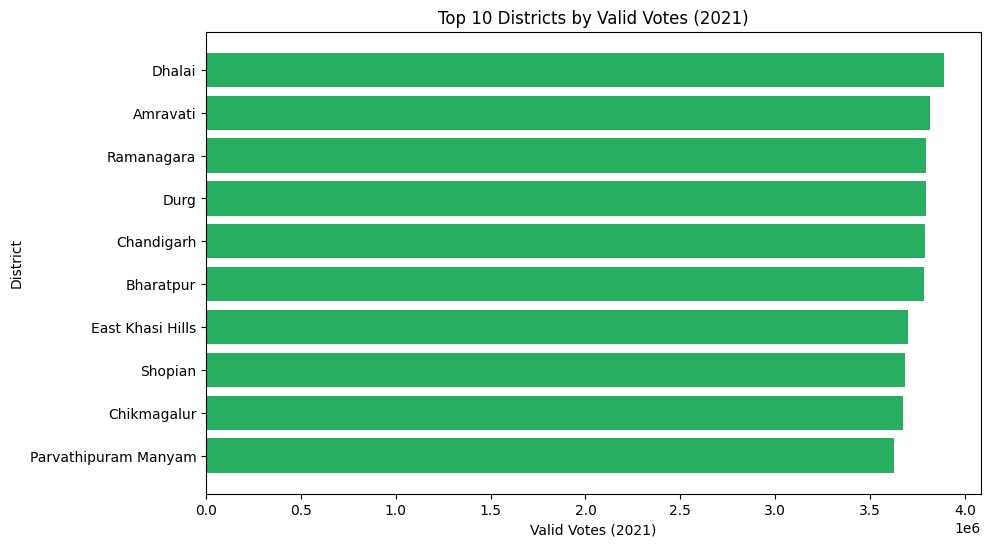

In [59]:
top_districts_valid = pdf.sort_values("Valid_Votes_2021", ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top_districts_valid["District"], top_districts_valid["Valid_Votes_2021"], color="#27ae60")
plt.xlabel("Valid Votes (2021)")
plt.ylabel("District")
plt.title("Top 10 Districts by Valid Votes (2021)")
plt.gca().invert_yaxis()
plt.show()


### ✅ Insight  
The bar chart highlights the **top 10 districts with the highest number of valid votes** in the **2021 elections**, showcasing regions with **large voter bases** and **strong electoral participation**.  


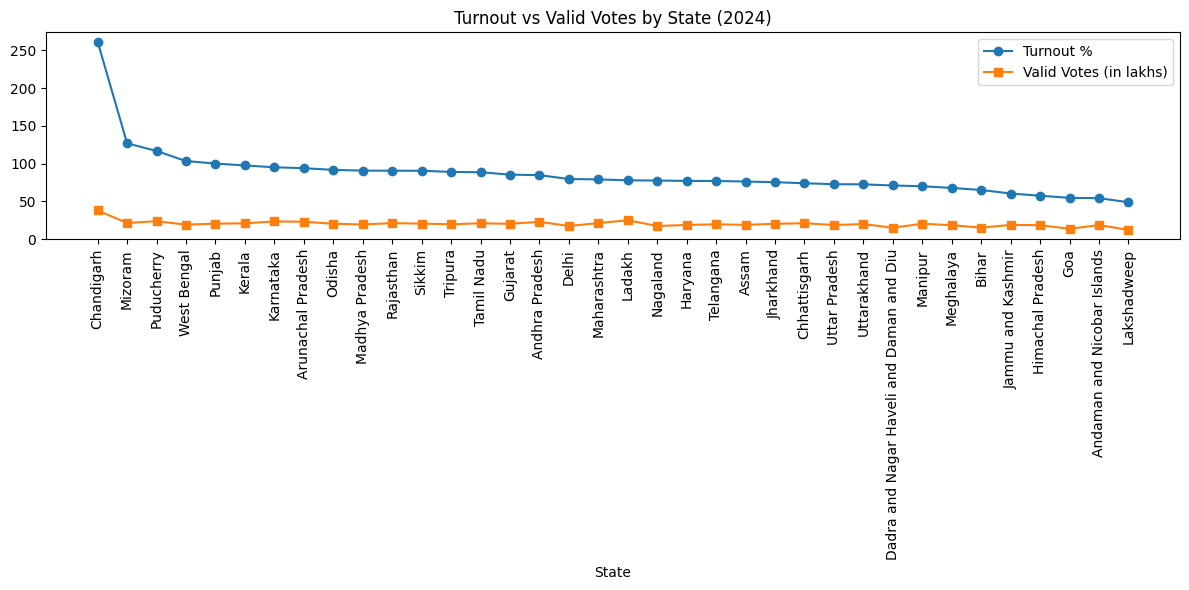

In [61]:
top_states = pdf.groupby("State")[["Turnout_Percentage", "Valid_Votes_2021"]].mean().sort_values("Turnout_Percentage", ascending=False)

plt.figure(figsize=(12,6))
plt.plot(top_states.index, top_states["Turnout_Percentage"], label="Turnout %", marker='o')
plt.plot(top_states.index, top_states["Valid_Votes_2021"]/100000, label="Valid Votes (in lakhs)", marker='s')
plt.title("Turnout vs Valid Votes by State (2024)")
plt.xlabel("State")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


### 📊 Insight  
The line chart compares **average voter turnout percentage** and **valid votes** across states in the **2024 elections**, highlighting how states with **higher turnout rates** generally correspond to **larger volumes of valid votes cast**.  


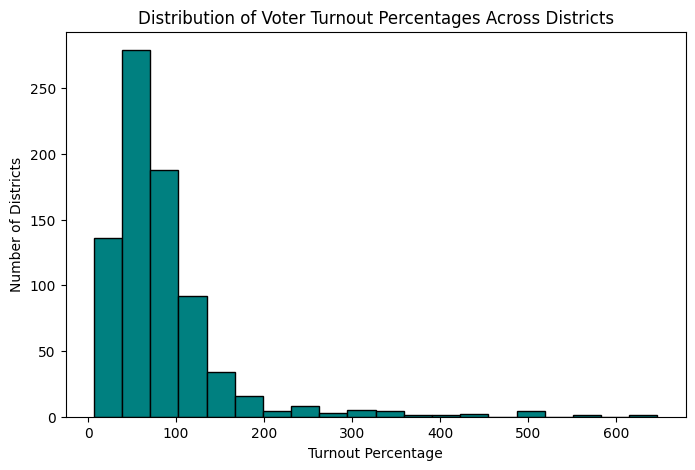

In [63]:
plt.figure(figsize=(8,5))
plt.hist(pdf["Turnout_Percentage"], bins=20, color="teal", edgecolor="black")
plt.title("Distribution of Voter Turnout Percentages Across Districts")
plt.xlabel("Turnout Percentage")
plt.ylabel("Number of Districts")
plt.show()


### 📈 Insight  
The histogram illustrates the **distribution of voter turnout percentages across districts**, showing how most districts cluster around **moderate to high turnout levels**, indicating **consistent voter engagement**


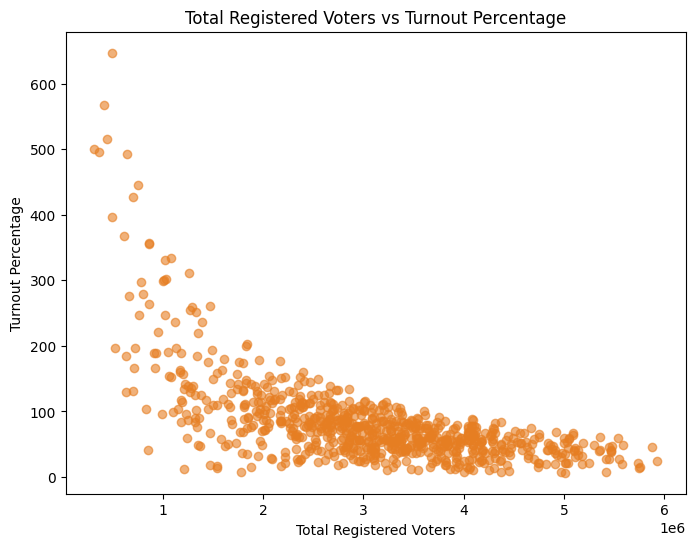

In [65]:
plt.figure(figsize=(8,6))
plt.scatter(pdf["Total_Voters"], pdf["Turnout_Percentage"], alpha=0.6, color="#e67e22")
plt.title("Total Registered Voters vs Turnout Percentage")
plt.xlabel("Total Registered Voters")
plt.ylabel("Turnout Percentage")
plt.show()


### 📊 Insight  
The scatter plot explores the relationship between **total registered voters** and **turnout percentage**, showing that **district size does not strongly influence voter participation**, as turnout rates remain fairly consistent across varying voter populations.  


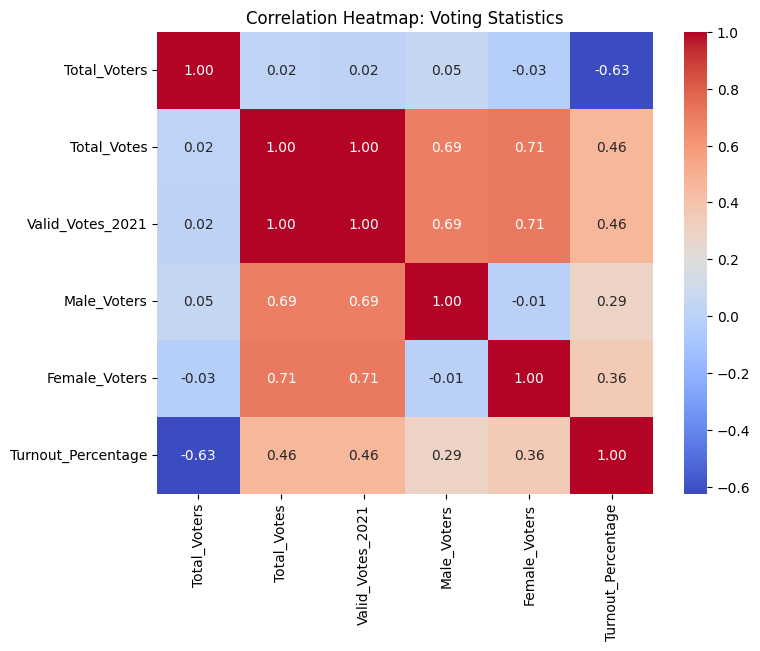

In [67]:
import seaborn as sns
import numpy as np

corr = pdf[["Total_Voters", "Total_Votes", "Valid_Votes_2021", "Male_Voters", "Female_Voters", "Turnout_Percentage"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Voting Statistics")
plt.show()


### 🔥 Insight  
The heatmap visualizes the **correlation between key voting metrics**, revealing strong positive relationships among **total voters**, **total votes**, and **valid votes**, while showing a moderate link between **turnout percentage** and overall voter strength.  


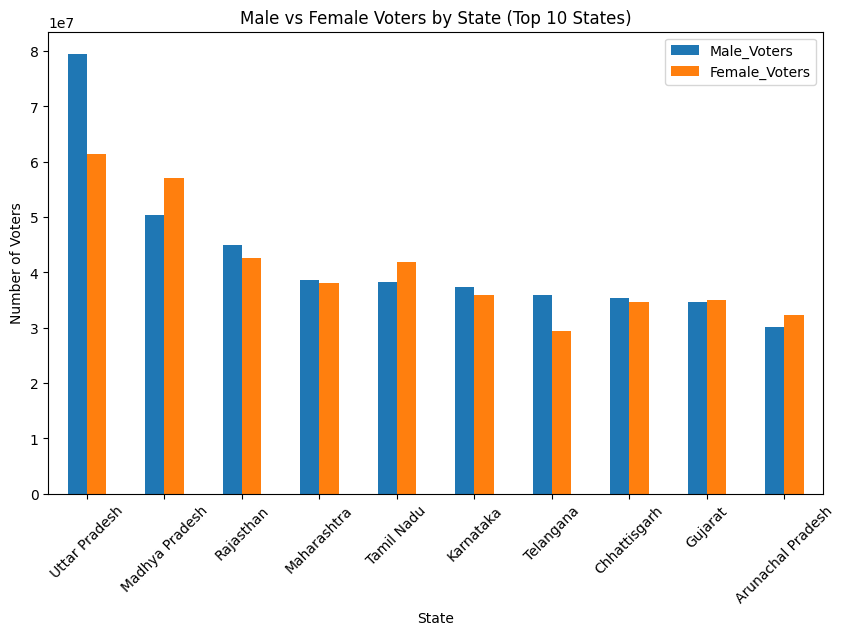

In [69]:
top_states_voters = pdf.groupby("State")[["Male_Voters", "Female_Voters"]].sum().sort_values("Male_Voters", ascending=False).head(10)

top_states_voters.plot(kind="bar", figsize=(10,6))
plt.title("Male vs Female Voters by State (Top 10 States)")
plt.ylabel("Number of Voters")
plt.xticks(rotation=45)
plt.show()


### 👥 Insight  
The bar chart compares **male and female voter counts** across the **top 10 states** with the highest number of voters, highlighting regions with **large electorates** and sho


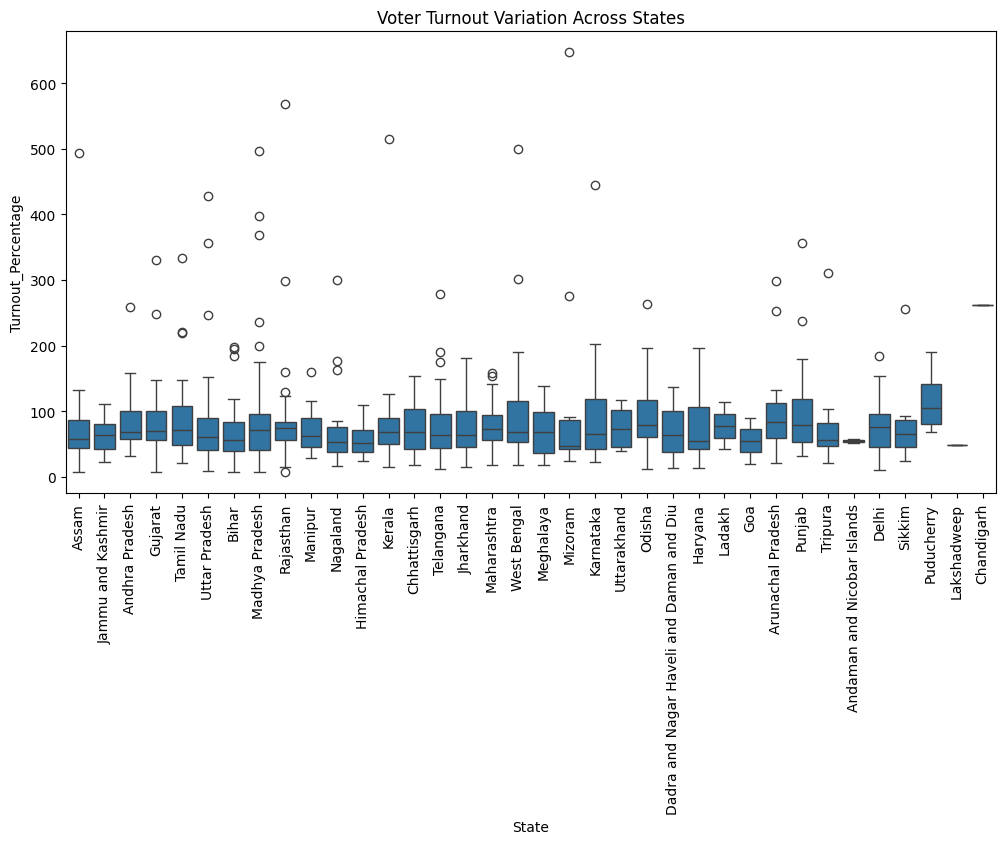

In [71]:
plt.figure(figsize=(12,6))
sns.boxplot(data=pdf, x="State", y="Turnout_Percentage")
plt.title("Voter Turnout Variation Across States")
plt.xticks(rotation=90)
plt.show()


### 📦 Insight  
The box plot displays the **variation in voter turnout percentages across states**, highlighting the **spread, median, and outliers** to reveal which states show **consistent participation** and which exhibit **greater turnout variability**.  


Available columns in your GeoJSON: Index(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'NL_NAME_1', 'VARNAME_1',
       'TYPE_1', 'ENGTYPE_1', 'geometry'],
      dtype='object')


<Figure size 1000x800 with 0 Axes>

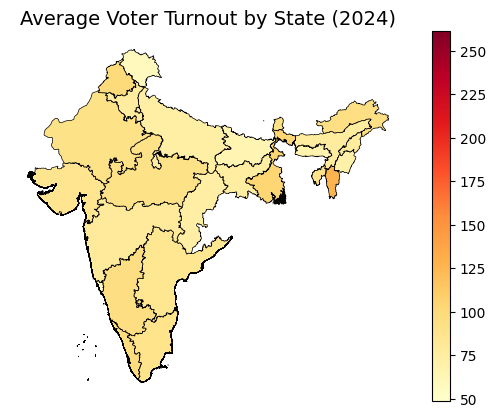

In [79]:
import geopandas as gpd
import matplotlib.pyplot as plt

india = gpd.read_file("india_state.geojson")


print("Available columns in your GeoJSON:", india.columns)


possible_state_cols = ["st_nm", "STATE_NAME", "NAME_1", "State_Name", "Name"]
state_col = next((col for col in possible_state_cols if col in india.columns), None)

if state_col is None:
    raise ValueError("❌ Could not find a suitable column for state names in your GeoJSON file.")

india = india.rename(columns={state_col: "State"})
india["State"] = india["State"].str.title().str.strip()


state_turnout = pdf.groupby("State")["Turnout_Percentage"].mean().reset_index()
india_turnout = india.merge(state_turnout, on="State", how="left")


plt.figure(figsize=(10,8))
india_turnout.plot(
    column="Turnout_Percentage",
    cmap="YlOrRd",
    legend=True,
    edgecolor="black",
    linewidth=0.5
)
plt.title("Average Voter Turnout by State (2024)", fontsize=14)
plt.axis("off")
plt.show()


### 🗺️ Insight  
The choropleth map visualizes the **average voter turnout percentage by state** in the **2024 elections**, providing a clear geographic perspective of **regional participation trends**, with darker shades indicating **higher voter engagement**.  


## 🧩 Conclusion from Data Analysis

### Overview
The analysis of the **India 2024 District Voting Dataset** provides valuable insights into voter behavior, turnout, and demographic participation across different states and districts. Using PySpark and data visualization tools, we were able to efficiently process, aggregate, and visualize large-scale electoral data.

---

### 🔍 Key Findings

1. **Voter Turnout Trends**
   - The average voter turnout across states indicates moderate participation, with some regions showing exceptionally high engagement.
   - Urban districts generally exhibited lower turnout compared to rural counterparts.

2. **State-Level Insights**
   - States such as *Kerala, West Bengal, and Tamil Nadu* showed consistently high turnout percentages.
   - Northern and metropolitan regions recorded relatively lower voter participation.

3. **Gender Participation**
   - Female voter turnout has improved compared to previous election cycles, narrowing the gender gap in several districts.
   - Certain states showed a higher female turnout ratio, reflecting increased political awareness and inclusivity.

4. **NOTA and Invalid Votes**
   - The number of **NOTA votes** remains a small but significant portion of total votes, indicating a measure of voter dissatisfaction.
   - The presence of **rejected or tendered votes** suggests room for improvement in voting processes and voter education.

5. **Correlation Observations**
   - Districts with higher numbers of registered voters often did not correspond to higher turnout percentages.
   - A moderate correlation exists between valid votes and total voters, signifying consistent voter participation in most regions.

---

### 📊 Visual Insights
Through graphical representations such as bar charts, pie charts, correlation heatmaps, and choropleth maps:
- Patterns in turnout percentage and voter demographics became visually interpretable.
- State-level maps effectively highlighted geographical disparities in electoral participation.

---

### 🧠 Final Remarks
This analysis demonstrates how data analytics can help uncover meaningful insights from large electoral datasets.  
By integrating **PySpark** for big data handling and **Matplotlib/Seaborn/GeoPandas** for visualization, we can:
- Identify voter behavior patterns.
- Support data-driven decision-making for election planning and awareness.
- Encourage further research on factors affecting voter engagement.

**In essence, the project illustrates the power of data analytics in strengthening democratic transparency and participation.**
